In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


In [25]:
# CSV file with the ESRB rating data
df = pd.read_csv('../Video_games_esrb_rating.csv')


In [26]:
# Show first 5 rows
df.head()


,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,...,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,Monster Jam Steel Titans 2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ET
2,NIER REPLICANT VER.1.22474487139…,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,Jamestown+,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,Neptunia Virtual Stars,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,T


In [27]:
# Correcting typo in the original dataframe
df = df.rename(columns={"strong_janguage": "strong_language"})


In [28]:
# Checking if there are repeated video game titles
df['title'].is_unique


True

In [29]:
# Drop uneeded colums
col_val = df.drop(['title', 'console'], inplace=True, axis=1)


In [30]:
# Show first 5 rows
df.head()


,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,...,sexual_content,sexual_themes,simulated_gambling,strong_language,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
1,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,ET
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,M
3,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,ET
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,T


In [31]:
# Get all unique ESRB ratings
ratings = df['esrb_rating'].unique()
ratings


array(['E', 'ET', 'M', 'T'], dtype=object)

In [32]:
y = df['esrb_rating']
X = df.drop(['esrb_rating'], axis=1)


In [33]:
# Make and train the decision classifier
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=SEED)
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier()

In [34]:
# Make predictions
y_pred = classifier.predict(X_test)


In [35]:
# Print confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 96   2   0   1]
 [  3  51   0   7]
 [  0   0  63  10]
 [  2  19   8 117]]
              precision    recall  f1-score   support

           E       0.95      0.97      0.96        99
          ET       0.71      0.84      0.77        61
           M       0.89      0.86      0.88        73
           T       0.87      0.80      0.83       146

    accuracy                           0.86       379
   macro avg       0.85      0.87      0.86       379
weighted avg       0.87      0.86      0.86       379



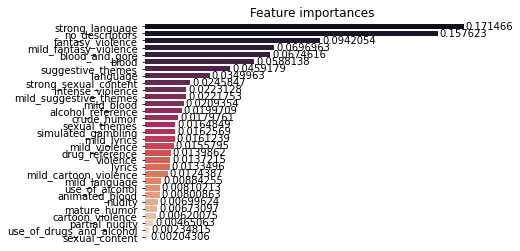

In [36]:
features_df = pd.DataFrame(
    {'features': classifier.feature_names_in_, 'importances': classifier.feature_importances_})

# Sorting data from highest to lowest
features_df_sorted = features_df.sort_values(by='importances', ascending=False)

# Barplot of the result without borders and axis lines
g = sns.barplot(data=features_df_sorted, x='importances',
                y='features', palette="rocket")
sns.despine(bottom=True, left=True)
g.set_title('Feature importances')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

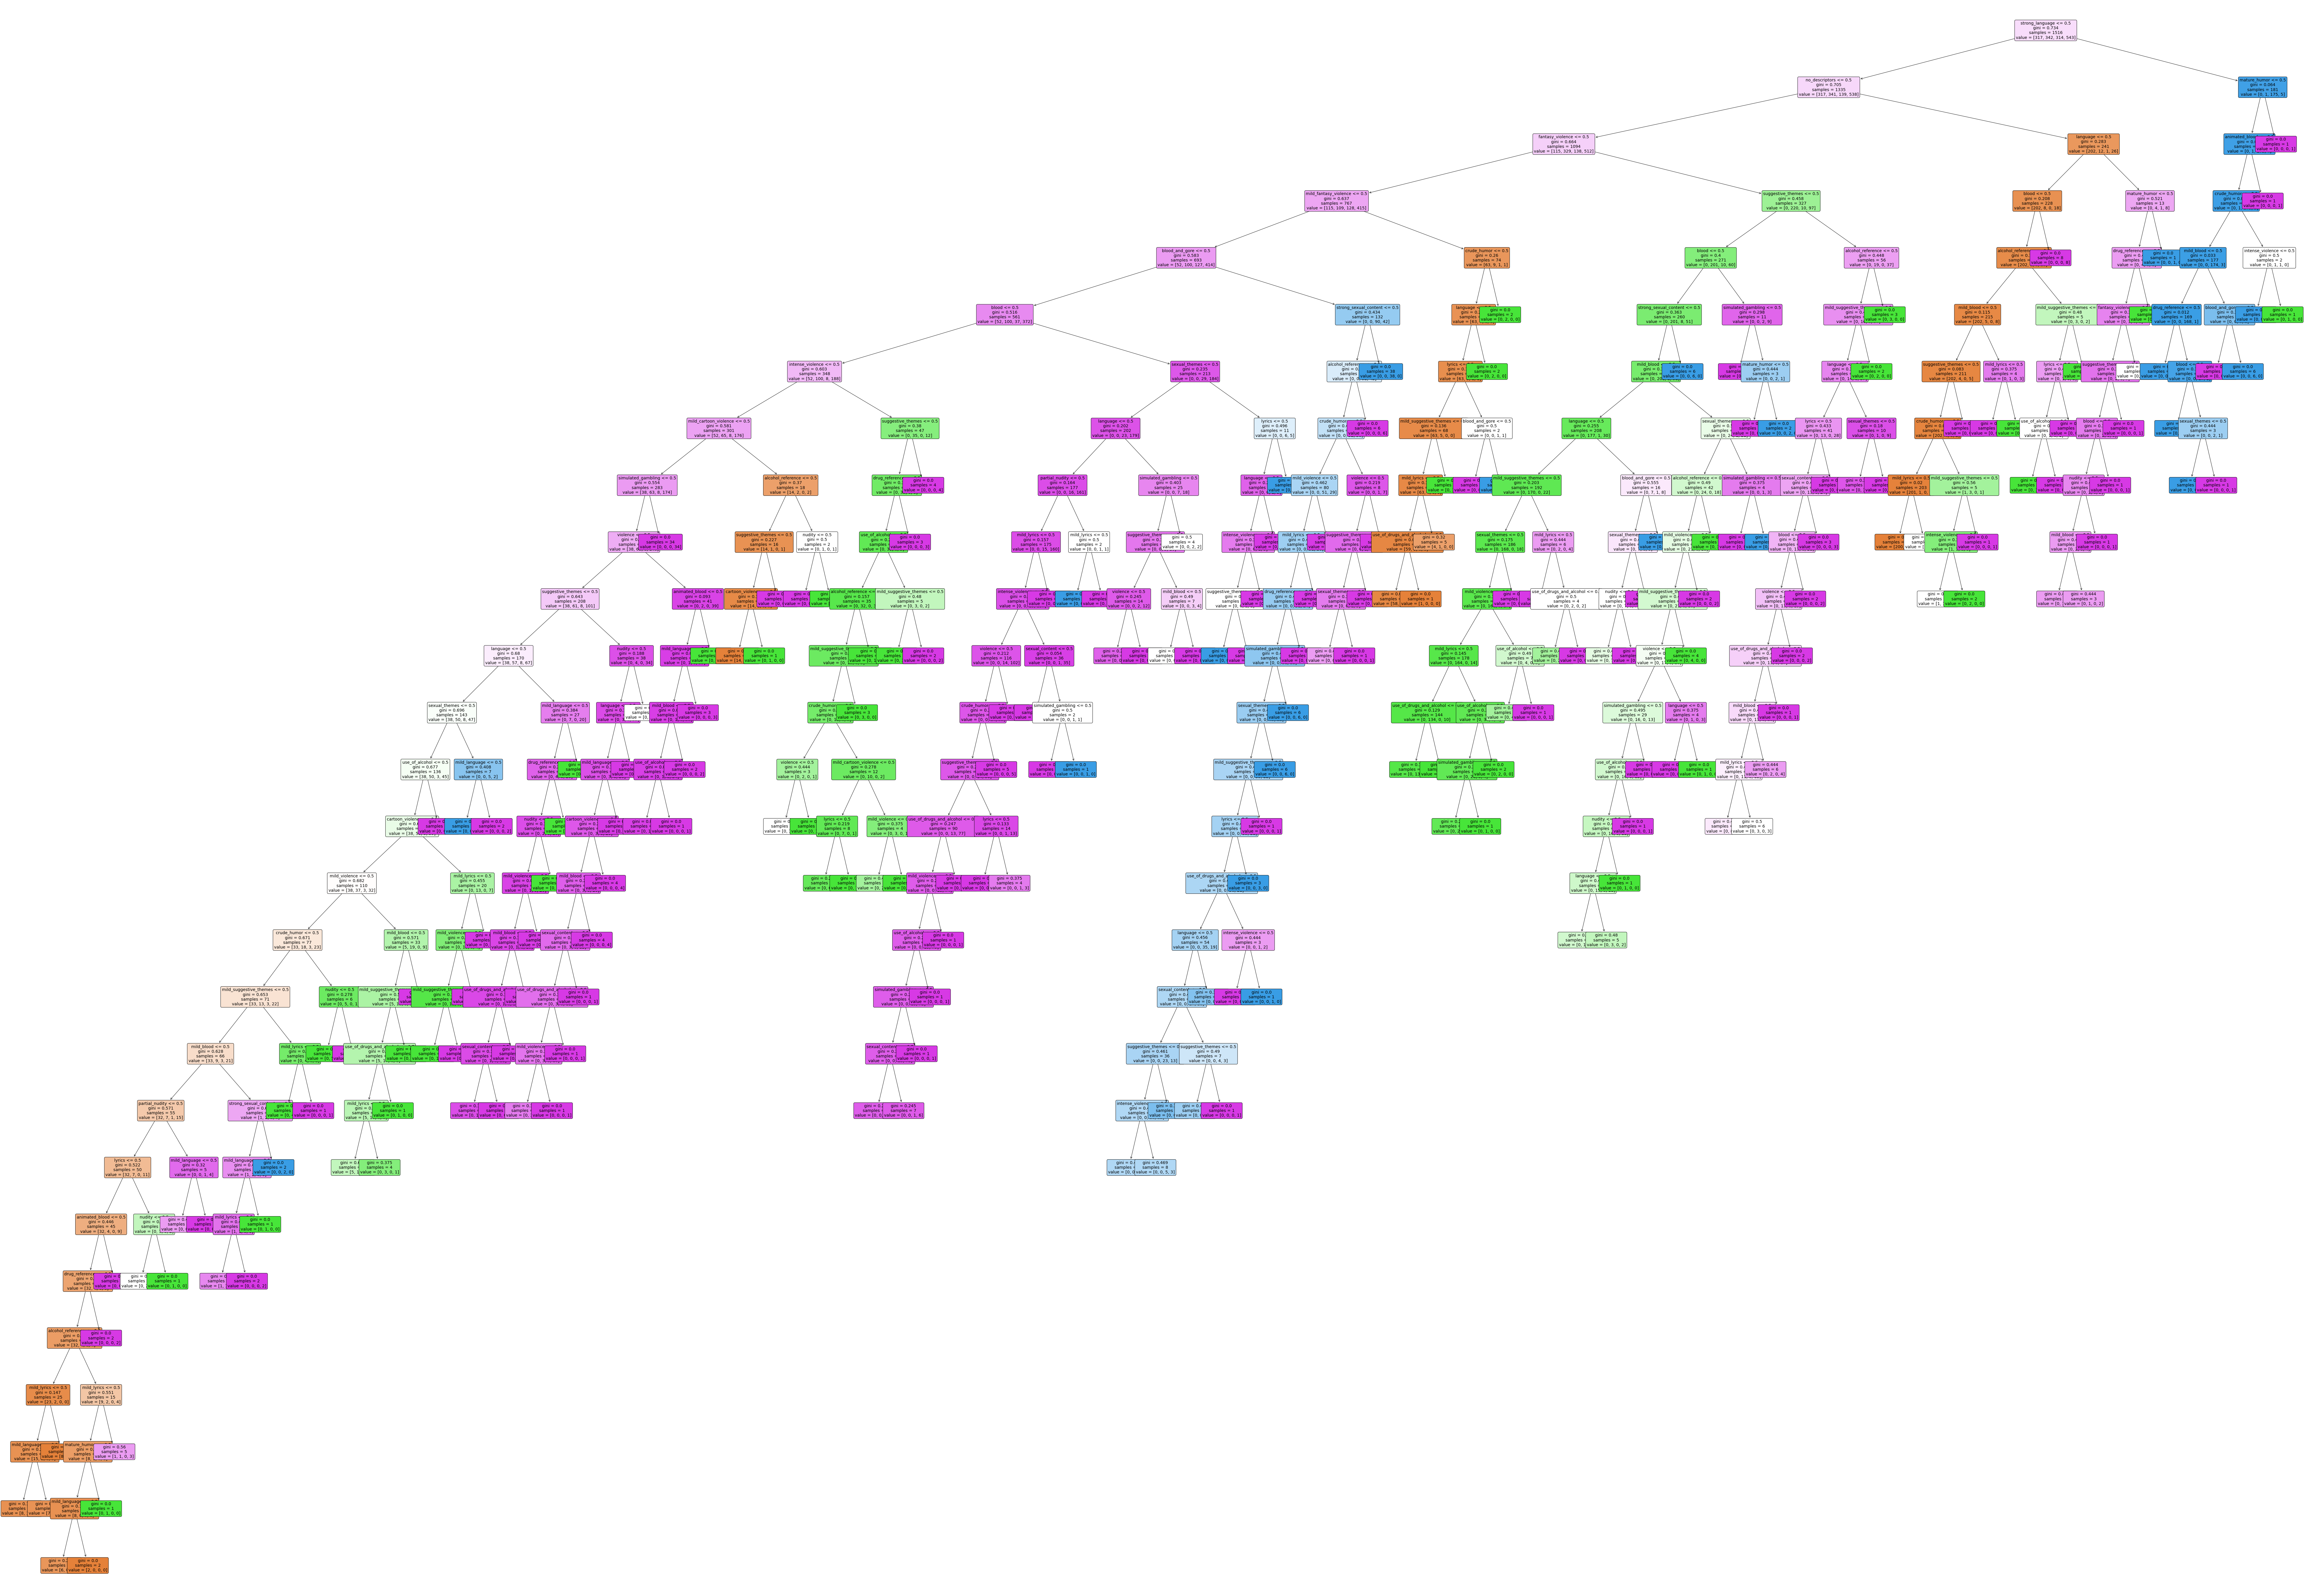

In [37]:
# Sklearn.tree built-in tree plot
plt.figure(figsize=(140, 100))  # size of figure
plot = tree.plot_tree(
    decision_tree=classifier,   # classifier
    feature_names=list(df.columns.values),
    fontsize=14,
    filled=True,
    rounded=True
)

# Save img
# plt.savefig("Decision_tree.jpeg")

plt.show()
